In [ ]:
pip install scikit-learn


In [4]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [6]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the merged dataset
merged_df = pd.read_csv("/Users/shreyas/Desktop/ANALYSIS/data/merged_data.csv")

# Calculate total sales per customer
customer_sales = merged_df.groupby('LYLTY_CARD_NBR')['TOT_SALES'].sum().reset_index()

# Calculate purchase frequency per customer
customer_frequency = merged_df.groupby('LYLTY_CARD_NBR')['TXN_ID'].count().reset_index()
customer_frequency.rename(columns={'TXN_ID': 'PURCHASE_FREQUENCY'}, inplace=True)

# Merge sales and frequency data
customer_data = customer_sales.merge(customer_frequency, on='LYLTY_CARD_NBR')

# Standardize the data
scaler = StandardScaler()
customer_data_scaled = scaler.fit_transform(customer_data[['TOT_SALES', 'PURCHASE_FREQUENCY']])

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
customer_data['CLUSTER'] = kmeans.fit_predict(customer_data_scaled)

# Save clustered data
customer_data.to_csv("customer_segments.csv", index=False)


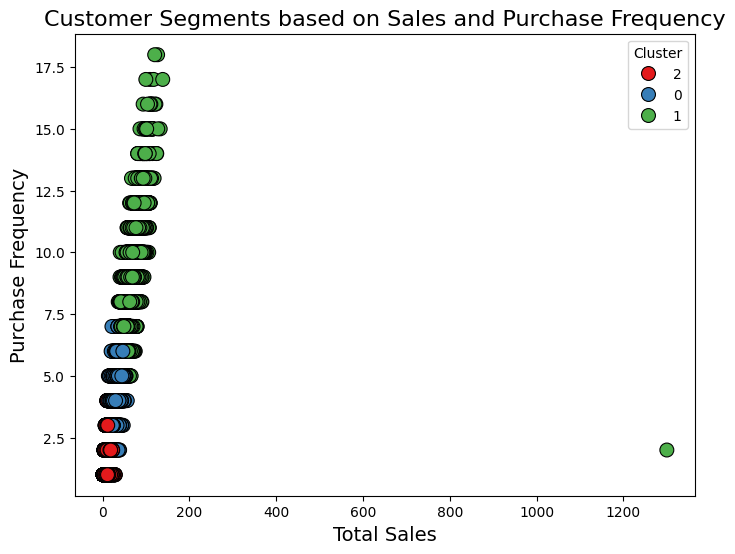

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Add cluster labels to the customer data for easier reference
customer_data['CLUSTER'] = customer_data['CLUSTER'].astype(str)

# Plot the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(data=customer_data, x='TOT_SALES', y='PURCHASE_FREQUENCY', hue='CLUSTER', palette='Set1', s=100, edgecolor='black')

# Add labels and title
plt.title('Customer Segments based on Sales and Purchase Frequency', fontsize=16)
plt.xlabel('Total Sales', fontsize=14)
plt.ylabel('Purchase Frequency', fontsize=14)
plt.legend(title='Cluster')

# Show the plot
plt.show()
